In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Crippen
from rdkit.Chem import Lipinski

from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
import numpy

In [2]:
# You can also load molecules from a file in other formats (e.g., SDF). Note
# that SDF files can contain multiple molecules. 
 
# `suppl` is a generator that yields each molecule, one at a time.
suppl = Chem.SDMolSupplier('mols.sdf')

In [3]:
# If any molecules can't be read, they will be None. Filter them out.
ms = [x for x in suppl if x is not None]

# How many molecules did we get?
print(len(ms))

118


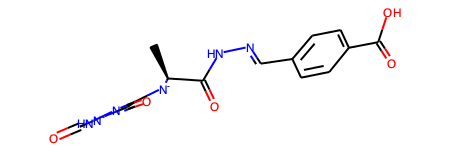

In [4]:
# Show the first molecule. In this case, the molecules have 3D coordinates
# assigned.
ms[0]

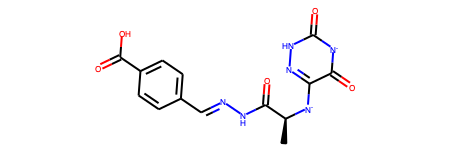

In [5]:
# To improve the drawing, let's calculate 2D coordiantes instead.
for m in ms:
    AllChem.Compute2DCoords(m)

ms[0]

In [6]:
# Use the Butina algorithm to cluster the compounds in the ms list. See
# https://projects.volkamerlab.org/teachopencadd/talktorials/T005_compound_clustering.html

# NOTE: I won't ask you how to run Butina using RDKit specifically. Good to
# understand how Butina algorithm works generally, though.

# Convert all the molecules to fingerprints
fps = [Chem.RDKFingerprint(m) for m in ms]

def tanimoto_distance_matrix(fp_list):
    """Calculate distance matrix for fingerprint list"""

    dissimilarity_matrix = []
    # Notice how we are deliberately skipping the first and last items in the
    # list because we don't need to compare them against themselves
    for i in range(1, len(fp_list)):
        # Compare the current fingerprint against all the previous ones in the
        # list
        similarities = DataStructs.BulkTanimotoSimilarity(fp_list[i], fp_list[:i])
        # Since we need a distance matrix, calculate 1-x for every element in
        # similarity matrix
        dissimilarity_matrix.extend([1 - x for x in similarities])
    return dissimilarity_matrix

distance_matrix = tanimoto_distance_matrix(fps)

In [7]:
# Run the Butina algorithm to cluster the molecules. NOTE: I won't ask you how
# to run Butina using RDKit specifically. Good to understand how Butina
# algorithm works generally, though.

clusters = Butina.ClusterData(distance_matrix, len(fps), 0.125, isDistData=True)
clusters = sorted(clusters, key=len, reverse=True)

In [8]:
# `clusters` is a list of tuples, where each tuple contains the indices of the
# molecules in that cluster.

print(len(clusters))

clusters

55


[(77, 0, 3, 10, 15, 20, 21, 34, 35, 42, 48, 57, 69, 80, 88, 93),
 (87, 29, 32, 39, 70, 84, 98, 102, 111),
 (67, 16, 30, 52, 59, 65, 85, 86, 103),
 (76, 2, 23, 40, 60, 63, 83, 106),
 (100, 1, 22, 33, 46, 94),
 (72, 24, 37, 50, 61),
 (49, 71, 107, 110),
 (14, 82, 116),
 (19, 79, 96),
 (97, 6, 54),
 (53, 8, 28),
 (114, 43),
 (91, 55),
 (73, 68),
 (66, 26),
 (13, 7),
 (56,),
 (117,),
 (115,),
 (113,),
 (112,),
 (109,),
 (108,),
 (105,),
 (104,),
 (101,),
 (99,),
 (95,),
 (92,),
 (90,),
 (89,),
 (81,),
 (78,),
 (75,),
 (74,),
 (64,),
 (62,),
 (58,),
 (51,),
 (47,),
 (45,),
 (44,),
 (41,),
 (38,),
 (36,),
 (31,),
 (27,),
 (25,),
 (18,),
 (17,),
 (12,),
 (11,),
 (9,),
 (5,),
 (4,)]

In [9]:
# Let's look at the first cluster
first_cluster = clusters[0]
second_cluster = clusters[1]
first_cluster

(77, 0, 3, 10, 15, 20, 21, 34, 35, 42, 48, 57, 69, 80, 88, 93)

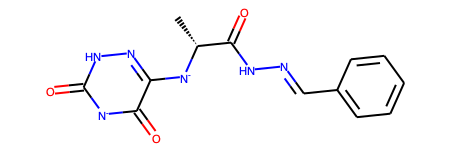

In [10]:
# Look at the structures themselves
ms[first_cluster[0]]

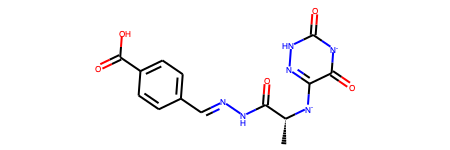

In [13]:
ms[first_cluster[3]]

In [14]:
# Calculate the molecular properties (logP, MW, number of hydrogen bond donors,
# number of hydrogen bond acceptors).

print("MW logP HBD HBA")
for m in ms:
    print(
        round(AllChem.CalcExactMolWt(m), 2),
        round(Crippen.MolLogP(m), 2), 
        round(Lipinski.NumHDonors(m), 2), 
        round(Lipinski.NumHAcceptors(m), 2)
    )


MW logP HBD HBA
344.09 -0.67 3 6
339.11 0.11 3 5
366.11 0.4 2 6
343.14 -0.3 2 6
289.11 1.8 0 4
266.11 -1.44 1 7
258.05 -2.4 3 7
364.16 -1.11 1 7
198.04 -1.43 2 4
183.0 -1.41 0 5
344.09 -0.67 3 6
274.07 -0.16 1 5
212.07 -2.53 3 5
364.16 -1.11 1 7
332.09 -1.04 3 7
316.09 -0.66 3 6
320.04 -0.1 2 5
396.06 -5.04 4 10
312.1 -0.09 2 5
363.99 0.01 2 5
378.01 0.39 2 5
316.09 -0.66 3 6
325.09 -0.28 3 5
456.16 2.36 2 6
296.17 -1.53 3 5
360.12 -0.26 3 7
306.05 -0.31 2 6
274.13 1.4 2 4
184.02 -1.82 2 4
346.1 -0.65 3 7
354.0 0.55 2 5
457.9 0.47 3 6
346.1 -0.65 3 7
325.09 -0.28 3 5
316.09 -0.66 3 6
318.09 -0.23 2 5
368.09 0.65 2 5
296.17 -1.53 3 5
391.09 -0.74 3 9
332.09 -1.04 3 7
456.16 2.36 2 6
378.11 1.04 2 6
316.09 -0.66 3 6
450.17 1.53 2 7
260.1 1.64 0 2
392.12 0.82 2 6
339.11 0.11 3 5
277.08 -0.61 2 5
368.02 0.94 2 5
258.14 2.2 0 2
296.17 -1.53 3 5
254.1 -0.32 1 5
320.04 -0.1 2 5
198.04 -1.43 2 4
272.07 -2.14 3 7
171.02 -1.4 1 5
424.01 0.11 3 7
378.01 0.39 2 5
360.12 -0.35 2 7
320.04 -0.1 2 5
4